# Лабораторная работа №3 Решение нелинейных уравнений и систем уравнений (НУ и НСУ)

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# 1) НУ
Решение нелинейного уравнения: $ x^2 - \frac{1}{5} \cdot e^x = 0 \implies f(x) = x^2 - \frac{1}{5} \cdot e^x \: \text{(IV.12.3(и))} $\
Пусть: $ g(x) = x^2, \quad h(x) = \frac{1}{5} \cdot e^x $

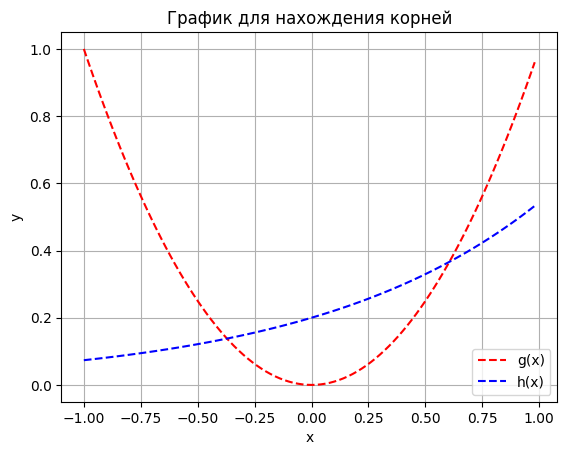

In [2]:
epsilon = 0.00001

def is_zero (num):
    if(np.abs(num) < epsilon):
        return 0.0
    else:
        return num

N = 100
a = -1.0
b =  1.0

def f_x(x):
    return x**2 - (1 / 5) * np.exp(x)

def df_dx(x):
    h = 2**(-3)
    return (f_x(x + h) - f_x(x - h)) / (2 * h)

def g_x(x):
    return x**2
def h_x(x):
    return (1 / 5) * np.exp(x)

x = np.zeros(N)
g = np.zeros(N)
h = np.zeros(N)

for i in range(N):
    x[i] = a + i * (b - a) / N
    g[i] = g_x(x[i])
    h[i] = h_x(x[i])


plt.plot(x, g, label='g(x)', ls = '--', color='red'  )
plt.plot(x, h, label='h(x)', ls = '--', color='blue' )
plt.legend()
plt.title('График для нахождения корней')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

Вначале воспользуемся методом простой итерации (МПИ). Возьмем: $\ $  
$ x_{i + 1} = \sqrt{\frac{exp(x_i)}{5}} $ \
Этот метод подходит, т.к. на отрезках локализации $ I_1 = [-0.50; -0.25], I_2 = [0.50; 0.75] $: \
$ \left|\frac{df}{dx}\right| < 1 $

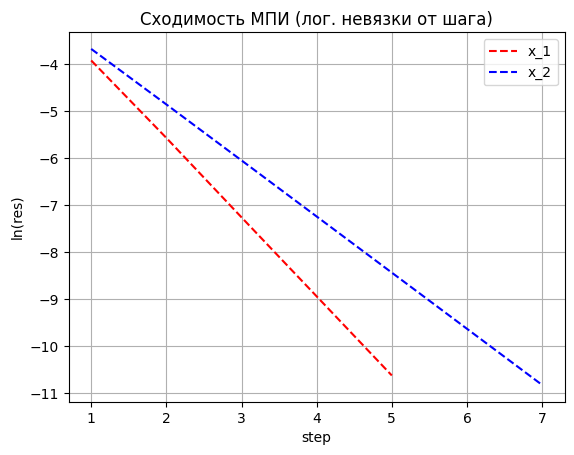

x_1 =  -0.37142288591106976 , count_1 =  6 , x_res_1 0.0
x_2 =  0.6052599856074345 , count_2 =  8 , x_res_2 0.0


In [3]:
#---------- Method of simple iteration ----------#
def MSI_2(x_start):
    x_curr = x_start
    x_next = 0.0

    count = 0
    count_ar = np.zeros(20)
    x_res = np.zeros(20)

    for i in range(20):
        count_ar[i] = i + 1

    while (is_zero(f_x(x_curr)) != 0.0) and count < 20:
        x_next = np.sqrt(np.exp(x_curr) / 5)
        
        x_curr = x_next
        x_res[count] = np.abs(is_zero(f_x(x_curr)))
        count += 1

    return x_curr, count, count_ar, x_res

def MSI_1(x_start):
    x_curr = x_start
    x_next = 0.0

    count = 0
    count_ar = np.zeros(20)
    x_res = np.zeros(20)

    for i in range(20):
        count_ar[i] = i + 1

    while (is_zero(f_x(x_curr)) != 0.0) and count < 20:
        x_next = - np.sqrt(np.exp(x_curr) / 5)
        
        x_curr = x_next
        x_res[count] = np.abs(is_zero(f_x(x_curr)))
        count += 1

    return x_curr, count, count_ar, x_res

x_1_msi, count_1_msi, count_ar_1_msi, x_res_1_msi = MSI_1(-0.5)
x_2_msi, count_2_msi, count_ar_2_msi, x_res_2_msi = MSI_2( 0.5)

plt.plot(count_ar_1_msi[0 : count_1_msi - 1], np.log(x_res_1_msi[0 : count_1_msi - 1]), label='x_1', ls = '--', color='red'  )
plt.plot(count_ar_2_msi[0 : count_2_msi - 1], np.log(x_res_2_msi[0 : count_2_msi - 1]), label='x_2', ls = '--', color='blue' )
plt.legend()
plt.title('Сходимость МПИ (лог. невязки от шага)')
plt.xlabel('step')
plt.ylabel('ln(res)')
plt.grid()
plt.show()

print("x_1 = ", x_1_msi, ", count_1 = ", count_1_msi, ", x_res_1", x_res_1_msi[count_1_msi - 1])
print("x_2 = ", x_2_msi, ", count_2 = ", count_2_msi, ", x_res_2", x_res_2_msi[count_2_msi - 1])
    

Далее идет метод Ньютона, где: $ x_{i + 1} = x_i - \frac{f(x_i)}{f'(x_i)} $

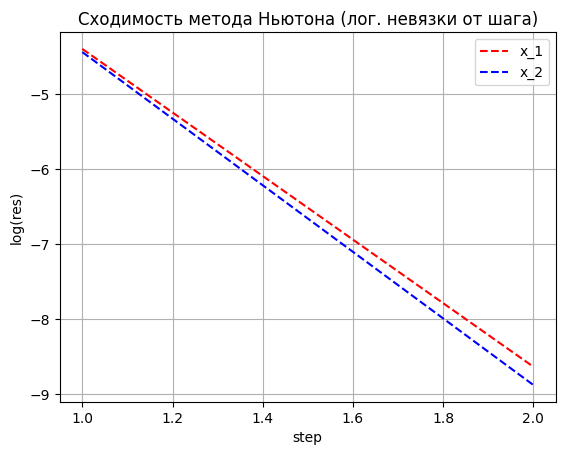

x_1 =  -0.37141787815035304 , count_1 =  3 , x_res_1 0.0
x_2 =  0.6052669605632083 , count_2 =  3 , x_res_2 0.0


In [4]:
#---------- Newton method ----------#

def Newton(x_start):
    x_curr = x_start
    x_next = 0.0

    count = 0
    count_ar = np.zeros(20)
    x_res = np.zeros(20)

    for i in range(20):
        count_ar[i] = i + 1

    while (is_zero(f_x(x_curr)) != 0.0) and count < 20:
        x_next = x_curr - (f_x(x_curr) / df_dx(x_curr))
        
        x_curr = x_next
        x_res[count] = np.abs(is_zero(f_x(x_curr)))
        count += 1

    return x_curr, count, count_ar, x_res

x_1_new, count_1_new, count_ar_1_new, x_res_1_new = Newton(-0.5)
x_2_new, count_2_new, count_ar_2_new, x_res_2_new = Newton( 0.5)

plt.plot(count_ar_1_new[0 : count_1_new - 1], np.log(x_res_1_new[0 : count_1_new - 1]), label='x_1', ls = '--', color='red'  )
plt.plot(count_ar_2_new[0 : count_2_new - 1], np.log(x_res_2_new[0 : count_2_new - 1]), label='x_2', ls = '--', color='blue' )
plt.legend()
plt.title('Сходимость метода Ньютона (лог. невязки от шага)')
plt.xlabel('step')
plt.ylabel('log(res)')
plt.grid()
plt.show()

print("x_1 = ", x_1_new, ", count_1 = ", count_1_new, ", x_res_1", x_res_1_new[count_1_new - 1])
print("x_2 = ", x_2_new, ", count_2 = ", count_2_new, ", x_res_2", x_res_2_new[count_2_new - 1])

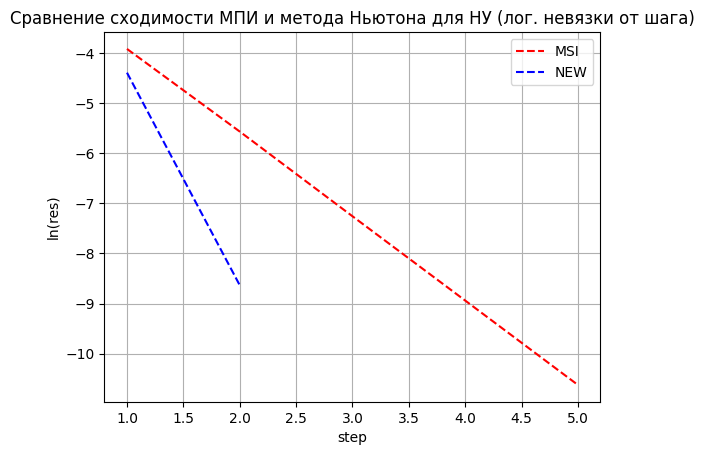

x_1_msi =  -0.37142288591106976 , count_1_msi =  6 , x_res_1_msi 0.0
x_1_new =  -0.37141787815035304 , count_1_new =  3 , x_res_1_new 0.0


In [5]:
plt.plot(count_ar_1_msi[0 : count_1_msi - 1], np.log(x_res_1_msi[0 : count_1_msi - 1]), label='MSI', ls = '--', color='red'  )
plt.plot(count_ar_1_new[0 : count_1_new - 1], np.log(x_res_1_new[0 : count_1_new - 1]), label='NEW', ls = '--', color='blue' )
plt.legend()
plt.title('Сравнение сходимости МПИ и метода Ньютона для НУ (лог. невязки от шага)')
plt.xlabel('step')
plt.ylabel('ln(res)')
plt.grid()
plt.show()

print("x_1_msi = ", x_1_msi, ", count_1_msi = ", count_1_msi, ", x_res_1_msi", x_res_1_msi[count_1_msi - 1])
print("x_1_new = ", x_1_new, ", count_1_new = ", count_1_new, ", x_res_1_new", x_res_1_new[count_1_new - 1])

# 2) НСУ
Система взята из IV.12.6: $\ $
$ \sin(x) - y = 1.32 \qquad \text{and} \qquad \cos(y) - x = -0.85 $


In [6]:
def print_matrix(name, A, n, m):
    print("\n", "Matrix", name, "(", n, "x", m, "):")
    
    for i in range(n):
        print("||", end = ' ')
        for j in range(m):
            if(is_zero(A[i][j]) >= 0):
                print(" ", end = '')
            print(format(is_zero(A[i][j]), '5.5f'), end = ' ')
        print("||")
    
    print("\n")
    
    return

def vec_norm (v, n):
    res = 0.0
    for i in range(n):
        res = res + v[i] ** 2
    res = res ** (0.5)
    return res

def matrix_dot (A, x, n):
    res = np.zeros((n, 1))
    for i in range(n):
        for j in range(n):
            res[i] += A[i][j] * x[j]

    return res

def skalar_dot (a, b, n):
    res = 0.0
    for i in range(n):
        res += a[i] * b[i]

    return res

def f_1(x, y):
    return np.sin(x) - y - 1.32
    
def f_2(x, y):
    return np.cos(y) - x + 0.85
    
def F_xy(X):
    res = np.zeros((2, 1))

    res[0] = f_1(X[0], X[1])
    res[1] = f_2(X[0], X[1])

    return res

def G_xy(X):
    res = np.zeros((2, 2))
    x = X[0]
    y = X[1]
    
    h = 2**(-4)
    res[0][0] = (f_1(x + h, y) - f_1(x - h, y)) / (2 * h)
    res[1][0] = (f_2(x + h, y) - f_2(x - h, y)) / (2 * h)

    res[0][1] = (f_1(x, y + h) - f_1(x, y - h)) / (2 * h)
    res[1][1] = (f_2(x, y + h) - f_2(x, y - h)) / (2 * h)

    return res

    

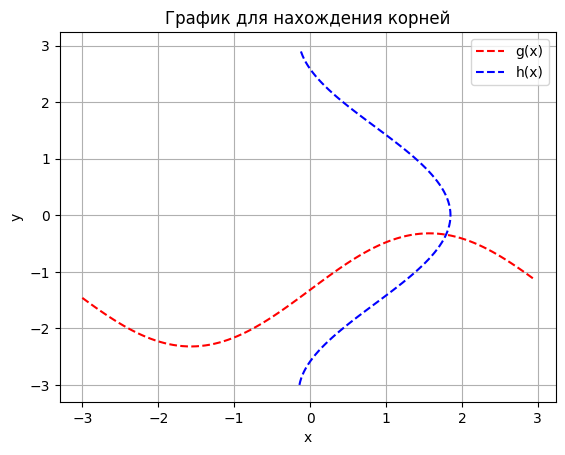

In [7]:
x = np.zeros(N)
y = np.zeros(N)

a = -3.0
b = 3.0

for i in range(N):
    x[i] = a + i * (b - a) / N
    y[i] = a + i * (b - a) / N


plt.plot(x, np.sin(x) - 1.32, label='g(x)', ls = '--', color='red'  )
plt.plot(np.cos(y) + 0.85 , y, label='h(x)', ls = '--', color='blue' )
plt.legend()
plt.title('График для нахождения корней')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

Метод Ньютона для НСУ: $ \ $
$ G(\vec{x_i}) \Delta \vec{x} = - \vec{f}(\vec{x_i}) \ $ \
Где:
$ \Delta \vec{x} = \vec{x_{i + 1}} - \vec{x_i}, \qquad \vec{f}(\vec{x_i}) - \text{вектор-функция}, \qquad G(\vec{x_i}) - \text{матрица Якоби вектор-функции} $

In [8]:
x_start = np.zeros((2, 1))
x_start[0] =  1.0
x_start[1] = -1.0

#---------- Newton method ----------#
x_curr = np.zeros((2, 1))
x_next = np.zeros((2, 1))
delt_x = np.zeros((2, 1))
A      = np.zeros((2, 2))
b      = np.zeros((2, 1))


count_new = 0
count_ar_new = np.zeros(20)
x_res_new = np.zeros(20)

for i in range(20):
    count_ar_new[i] = i + 1

x_curr = x_start

while (is_zero(f_1(x_curr[0], x_curr[1])) != 0 or is_zero(f_2(x_curr[0], x_curr[1])) != 0) and count_new < 20:
    A = G_xy(x_curr)
    b = - F_xy(x_curr)
    #---------- Gauss method for system "A delta_x = b" ----------#
    n = 2
    x_inter = np.zeros(n)
    matrix  = np.zeros((n, n + 1))

    for i in range(n):
        for j in range(n):
            matrix[i][j] = A[i][j]
        matrix[i][n] = b[i]

    for i in range(n):
        max_row = i + np.argmax(np.abs(matrix[i:, i]))
        matrix[[i, max_row]] = matrix[[max_row, i]]

        for j in range(i + 1, n):
            factor = matrix[j][i] / matrix[i][i]
            matrix[j] = matrix[j] - factor * matrix[i]

    for i in range(n - 1, -1, -1):
        x_inter[i] = (matrix[i][-1] - np.dot(matrix[i][i + 1:n], x_inter[i + 1:n])) / matrix[i][i]

    for i in range(n):
        delt_x[i] = x_inter[i]
    #--------------------------------------------------------#

    x_next = delt_x + x_curr
    x_curr = x_next
    x_res_new[count_new] = np.sqrt((is_zero(f_1(x_curr[0], x_curr[1])))**2 + (is_zero(f_2(x_curr[0], x_curr[1])))**2)
    count_new += 1

x_new = x_curr


Метод простой итерации для НСУ аналогичен МПИ для НУ. Здесь берем: \
$ x_{i + 1} = \cos(y_i) + 0.85 \qquad y_{i + 1} = \sin(x_i) - 1.32 $

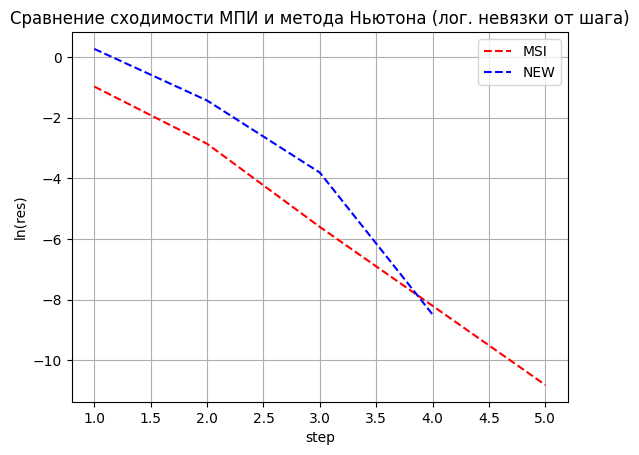


 Matrix x_new ( 2 x 1 ):
||  1.79134 ||
|| -0.34422 ||



 Matrix x_msi ( 2 x 1 ):
||  1.79134 ||
|| -0.34422 ||




In [9]:
#---------- MSI ----------#
def MSI_SYS(x_start):
    x_curr = x_start
    x_next = np.zeros((2, 1))

    count = 0
    count_ar = np.zeros(20)
    x_res = np.zeros(20)

    for i in range(20):
        count_ar[i] = i + 1

    while (is_zero(f_1(x_curr[0], x_curr[1])) != 0 or is_zero(f_2(x_curr[0], x_curr[1])) != 0) and count < 20:
        x_next[0] = np.cos(x_curr[1]) + 0.85
        x_next[1] = np.sin(x_curr[0]) - 1.32
        
        x_curr = x_next
        x_res[count] = np.sqrt((is_zero(f_1(x_curr[0], x_curr[1])))**2 + (is_zero(f_2(x_curr[0], x_curr[1])))**2)
        count += 1

    return x_curr, count, count_ar, x_res

x_msi, count_msi, count_ar_msi, x_res_msi = MSI_SYS(x_start)

plt.plot(count_ar_msi[0 : count_msi - 1], np.log(x_res_msi[0 : count_msi - 1]), label='MSI', ls = '--', color='red'  )
plt.plot(count_ar_new[0 : count_new - 1], np.log(x_res_new[0 : count_new - 1]), label='NEW', ls = '--', color='blue' )
plt.legend()
plt.title('Сравнение сходимости МПИ и метода Ньютона (лог. невязки от шага)')
plt.xlabel('step')
plt.ylabel('ln(res)')
plt.grid()
plt.show()

print_matrix("x_new", x_curr, 2, 1)
print_matrix("x_msi", x_msi , 2, 1)


In [10]:
print("count_new = ", count_new, ", x_res_new", x_res_new[count_new - 1])
print("count_msi = ", count_msi, ", x_res_msi", x_res_msi[count_msi - 1])

count_new =  5 , x_res_new 0.0
count_msi =  6 , x_res_msi 0.0


# Выводы
В данной лабораторной работе мы ознакомились с методами решения нелинейных уравнений и систем уравнений. Видно, что в обоих случаях метод Ньютона сходится быстрее метода простой итерации, что несложно объяснить тем, что первый опирается на информацию о производной, позволяя быстрее приблизиться к нулю. Заметим также, что для МПИ требуется дополнительное исследование для определения целесеобразности его применимости.